In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

Asegurarse de tener los registros en una carpeta llamada como la variable _ruta_mediciones_

In [2]:
ruta_mediciones = "mediciones"

---

El ultimo experimento tiene algunos valores no numericos en la columna de la corriente cuando se va a la mierda, los sacamos.

In [3]:
clin = pd.read_csv(f"{ruta_mediciones}/Exp4.xls", sep='\t')
clin = clin.iloc[:174]
clin.to_csv("mediciones/Exp4.xls", index=False, sep='\t')

In [4]:
def voltaje(t, vo, c=0.0022, r=10000):
    return vo*(1-math.e**(-t/(c*r)))

In [5]:
voltajes = [50, 50, 30, 50]
registros = [30, 20, 15, 8]

In [6]:
def generar_grafico(experimento, registro, v0, c=0.0022, r=10000):
    df = pd.read_csv(f"{ruta_mediciones}/Exp{experimento+1}.xls", sep='\t')
    df["Time"] = df["Time"].astype("datetime64")
    
    df["Time"] = df["Time"] - df["Time"][registro-1]
    df["Time"] = df["Time"].dt.total_seconds()
    df = df.iloc[registro-1:]
    df = df.reset_index(drop=True)
    
    intervalo = df["Time"].max()/df.shape[0]
    df["Time"] = df.index*intervalo
    df["Voltaje"] = voltaje(df["Time"], v0)
    
    return sns.lineplot(df["Voltaje"], df["Value"])

In [7]:
def guardar_graficos(registros, voltajes):
    """Guarda los graficos en una carpeta llamada 'Graficos' """
    ruta = "Graficos"
    if not os.path.exists(ruta):
        os.makedirs(ruta)
    for i in range(len(registros)):
        plt.clf()
        grafico = generar_grafico(i, registros[i], voltajes[i])
        grafico.get_figure().savefig(f"{ruta}/Corrient-experimento-{i}")

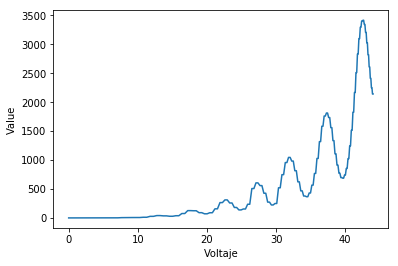

In [8]:
guardar_graficos(registros, voltajes)